# Incidence de la mortalité des femmes fumeuses et non fumeuses

### Partie 1

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [3]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"
data_file = "mortalite_femmes_fumeuses_ou_non.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Représentation du CSV étudié :

In [4]:
raw_data = pd.read_csv(data_file, encoding = 'iso-8859-1', error_bad_lines=False)
raw_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

Aucune ligne vide dans le csv.

In [29]:
tableau = raw_data['Smoker'].value_counts()
tableau

No     732
Yes    582
Name: Smoker, dtype: int64

On représente ici le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme.

In [30]:
tableau = raw_data.groupby(['Smoker', 'Status']).size().reset_index(name='Nombre')
tableau

Smoker Status  Nombre
0     No  Alive     502
1     No   Dead     230
2    Yes  Alive     443
3    Yes   Dead     139

On calcule maintenant le taux de mortalité des femmes fumeuses et non fumeuses.

In [31]:
def calcul_taux_mortalite(smoker):
    nb_femmes_mortes = raw_data[(raw_data['Smoker'] == smoker) & (raw_data['Status'] == 'Dead')].shape[0]
    nb_femmes = (raw_data['Smoker'] == smoker).sum()
    return nb_femmes_mortes / nb_femmes

taux_mortalite_fumeuses = calcul_taux_mortalite('Yes')
taux_mortalite_non_fumeuses = calcul_taux_mortalite('No')

print(f"Le taux de mortalité des fumeuses est de {taux_mortalite_fumeuses}")
print(f"Le taux de mortalité des non fumeuses est de {taux_mortalite_non_fumeuses}")

Le taux de mortalité des fumeuses est de 0.23883161512027493
Le taux de mortalité des non fumeuses est de 0.31420765027322406


On calcule ensuite l'intervale de confiance de ces taux de mortalité.

In [32]:
import statsmodels.api as sm

def intervale_confiance(smoker):
    n = (raw_data['Smoker'] == smoker).sum()
    p = calcul_taux_mortalite(smoker)
    # Intervalle de confiance à 95%
    intevaleC = sm.stats.proportion_confint(count=int(n * p), nobs=n, alpha=0.05, method='normal')
    return intevaleC

intervale_fumeuses = intervale_confiance('Yes')
intervale_non_fumeuses = intervale_confiance('No')

print(f"L'intervale de confiance du taux de mortalité des fumeuses est {intervale_fumeuses}")
print(f"L'intervale de confiance du taux de mortalité des non fumeuses est {intervale_non_fumeuses}")

L'intervale de confiance du taux de mortalité des fumeuses est (0.20419201440918022, 0.27347121583136963)
L'intervale de confiance du taux de mortalité des non fumeuses est (0.28057994394817404, 0.3478353565982741)


On fait ensuite une répresentation graphique de nos données.

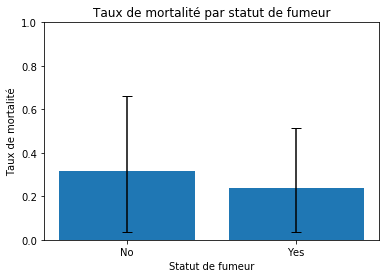

In [67]:
import matplotlib.pyplot as plt
  
status_fumeur = ['No', 'Yes']  
valeur_mortalite = [taux_mortalite_non_fumeuses, taux_mortalite_fumeuses]
min_intervaleC = [intervale_non_fumeuses[0], intervale_fumeuses[0]]
max_intervaleC = [intervale_non_fumeuses[1], intervale_fumeuses[1]]

plt.bar(status_fumeur, valeur_mortalite, yerr=[min_intervaleC, max_intervaleC], capsize=5)
plt.title('Taux de mortalité par statut de fumeur')
plt.ylabel('Taux de mortalité')
plt.xlabel('Statut de fumeur')
plt.ylim(0, 1)
plt.show()

Le résultat est étrange car le taux de mortalité des femmes fumeuses est supérieur à celui des femmes non fumeuses, ce qui est incohérent par rapport à nos connaissances sur les conséquences de l'usage du tabac. Nous avons sûrement oublié de prendre en compte une donnée essentielle.

### Partie 2

On reprend donc l'analyse précédente en prenant en compte des périodes d'âges : 
    *18-34 ans, 35-54 ans, 55-64 ans, plus de 65 ans*

In [9]:
bins = [18, 34, 54, 64, 100]
labels = ['18-34', '35-54', '55-64', '65+']
raw_data['Age Groupe'] = pd.cut(raw_data['Age'], bins=bins, labels=labels, right=False)

tableau = raw_data.groupby(['Smoker', 'Status', 'Age Groupe']).size().reset_index(name='Nombre')
tableau_trie = tableau.set_index('Age Groupe').sort_index()
tableau_trie

Smoker Status  Nombre
Age Groupe                      
18-34          No  Alive     213
18-34          No   Dead       6
18-34         Yes  Alive     174
18-34         Yes   Dead       5
35-54          No  Alive     180
35-54          No   Dead      19
35-54         Yes  Alive     198
35-54         Yes   Dead      41
55-64          No  Alive      80
55-64          No   Dead      39
55-64         Yes  Alive      64
55-64         Yes   Dead      51
65+            No  Alive      29
65+            No   Dead     166
65+           Yes  Alive       7
65+           Yes   Dead      42

On calcule le taux de mortalité en fonction de ces périodes d'âges.

In [48]:
def calcul_taux_mortalite_periode(smoker, age_min, age_max=200):
    nb_femmes_mortes = raw_data[(raw_data['Smoker'] == smoker) & (raw_data['Status'] == 'Dead') & (raw_data['Age']>=age_min) & (raw_data['Age']<age_max)].shape[0]
    nb_femmes = (raw_data['Smoker'] == smoker).sum()
    return nb_femmes_mortes / nb_femmes

taux_mortalite_fumeuses_18_34 = calcul_taux_mortalite_periode('Yes', 18, 34)
taux_mortalite_fumeuses_35_54 = calcul_taux_mortalite_periode('Yes', 35, 54)
taux_mortalite_fumeuses_55_64 = calcul_taux_mortalite_periode('Yes', 55, 64)
taux_mortalite_fumeuses_65 = calcul_taux_mortalite_periode('Yes', 65)

taux_mortalite_non_fumeuses_18_34 = calcul_taux_mortalite_periode('No', 18, 34)
taux_mortalite_non_fumeuses_35_54 = calcul_taux_mortalite_periode('No', 35, 54)
taux_mortalite_non_fumeuses_55_64 = calcul_taux_mortalite_periode('No', 55, 64)
taux_mortalite_non_fumeuses_65 = calcul_taux_mortalite_periode('No', 65)

print(f"Le taux de mortalité des fumeuses de 18 à 34 ans est de {taux_mortalite_fumeuses_18_34}")
print(f"Le taux de mortalité des non fumeuses de 18 à 34 ans est de {taux_mortalite_non_fumeuses_18_34}\n")

print(f"Le taux de mortalité des fumeuses de 35 à 54 ans est de {taux_mortalite_fumeuses_35_54}")
print(f"Le taux de mortalité des non fumeuses de 35 à 54 ans est de {taux_mortalite_non_fumeuses_35_54}\n")

print(f"Le taux de mortalité des fumeuses de 55 à 64 ans est de {taux_mortalite_fumeuses_55_64}")
print(f"Le taux de mortalité des non fumeuses de 55 à 64 ans est de {taux_mortalite_non_fumeuses_55_64}\n")

print(f"Le taux de mortalité des fumeuses de 65 ans et plus est de {taux_mortalite_fumeuses_65}")
print(f"Le taux de mortalité des non fumeuses de 65 ans et plus est de {taux_mortalite_non_fumeuses_65}\n")

Le taux de mortalité des fumeuses de 18 à 34 ans est de 0.00859106529209622
Le taux de mortalité des non fumeuses de 18 à 34 ans est de 0.00819672131147541

Le taux de mortalité des fumeuses de 35 à 54 ans est de 0.06701030927835051
Le taux de mortalité des non fumeuses de 35 à 54 ans est de 0.025956284153005466

Le taux de mortalité des fumeuses de 55 à 64 ans est de 0.08762886597938144
Le taux de mortalité des non fumeuses de 55 à 64 ans est de 0.05327868852459016

Le taux de mortalité des fumeuses de 65 ans et plus est de 0.07216494845360824
Le taux de mortalité des non fumeuses de 65 ans et plus est de 0.22540983606557377



On se rend compte en analysant ces nouvelles données que le taux de mortalité des femmes fumeuses est légèrement supérieur à celui des femmes non fumeuses pour toutes les tranches d'âges à part celle des 65 ans et plus où les femmes non fumeuses ont un taux de mortalité beaucoup plus élevé que celui des femmes fumeuses. Cela explique donc que le taux de mortalité global des femmes non fumeuses soit supérieur à celui des femmes fumeuses.

Ce résultat peut s'expliquer par le fait que les personnes plus âgées (femmes comme hommes) sont généralement plus susceptibles d'avoir des problèmes de santé qui augmentent leur mortalité, indépendamment de leur statut de fumeur. De plus, il y a moins de femmes fumeuses en vie de 65 ans et plus, celles-ci étant pour la plupart déjà mortes plus jeunes et il y a plus de femmes non fumeuses que de femmes fumeuses, celles-ci mourant le plus souvent à 65 ans et plus.

### Partie 3

On introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans.

In [54]:
raw_data['Death'] = raw_data['Status'].apply(lambda x: 1 if x == 'Dead' else 0)

print(raw_data[['Age', 'Smoker', 'Death']].head())

    Age Smoker  Death
0  21.0    Yes      0
1  19.3    Yes      0
2  57.5     No      1
3  47.1     No      0
4  81.4    Yes      0


On calcule ensuite la régression logistique sur le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses.

In [59]:
# Modèle pour les non-fumeurs  
non_fumeurs = raw_data[raw_data['Smoker'] == 'No']
X_ns = sm.add_constant(non_fumeurs['Age']) 
y_ns = non_fumeurs['Death']
model_ns = sm.Logit(y_ns, X_ns).fit()

# Modèle pour les fumeurs  
fumeurs = raw_data[raw_data['Smoker'] == 'Yes']
X_s = sm.add_constant(fumeurs['Age'])
y_s = fumeurs['Death']
model_s = sm.Logit(y_s, X_s).fit()

print(model_ns.summary())
print(model_s.summary())

Optimization terminated successfully.
         Current function value: 0.354560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412727
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Death   No. Observations:                  732
Model:                          Logit   Df Residuals:                      730
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.4304
Time:                        17:09:20   Log-Likelihood:                -259.54
converged:                       True   LL-Null:                       -455.62
                                        LLR p-value:                 2.808e-87
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const 

On modélise ensuite la régression logique à l'aide d'un graphique.

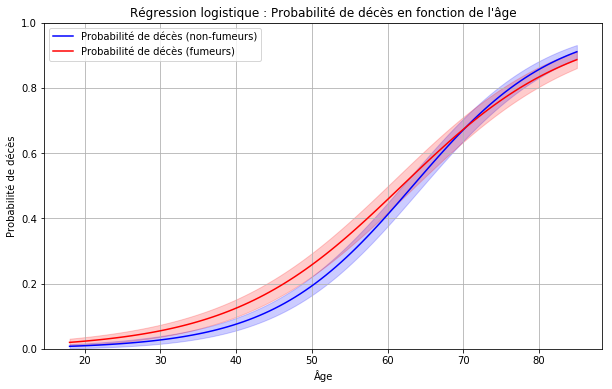

In [61]:
import numpy as np  

tranche_age = np.linspace(18, 85, 100)
 
pred_ns = model_ns.predict(sm.add_constant(age_range))
pred_s = model_s.predict(sm.add_constant(age_range))

# Calculer les intervalles de confiance  
int_conf_ns = intervale_confiance('No')
int_conf_s = intervale_confiance('Yes')

# Prédire les probabilités et les intervalles de confiance pour les non-fumeurs  
lower_bound_ns = model_ns.predict(sm.add_constant(tranche_age)) - 1.96 * np.sqrt(pred_ns * (1 - pred_ns) / len(non_fumeurs))
upper_bound_ns = model_ns.predict(sm.add_constant(tranche_age)) + 1.96 * np.sqrt(pred_ns * (1 - pred_ns) / len(non_fumeurs))

# Prédire les probabilités et les intervalles de confiance pour les fumeurs  
lower_bound_s = model_s.predict(sm.add_constant(tranche_age)) - 1.96 * np.sqrt(pred_s * (1 - pred_s) / len(fumeurs))
upper_bound_s = model_s.predict(sm.add_constant(tranche_age)) + 1.96 * np.sqrt(pred_s * (1 - pred_s) / len(fumeurs))

plt.figure(figsize=(10, 6))
plt.plot(tranche_age, pred_ns, label='Probabilité de décès (non-fumeurs)', color='blue')
plt.fill_between(age_range, lower_bound_ns, upper_bound_ns, color='blue', alpha=0.2)
plt.plot(tranche_age, pred_s, label='Probabilité de décès (fumeurs)', color='red')
plt.fill_between(age_range, lower_bound_s, upper_bound_s, color='red', alpha=0.2)
plt.title('Régression logistique : Probabilité de décès en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Probabilité de décès')
plt.legend()
plt.ylim(0, 1)
plt.grid()
plt.show()

Ces régressions vous permettent de conclure que la nocivité du tabagisme influe particulièrement sur le taux de mortalité des femmes de 18 à 65 ans. Les femmes fumeuses ont ainsi plus de chance de mourir jeune que les femmes non fumeuses. Cependant, ce phénomène s'inverse pour les femmes de plus de 65 ans, celui pourrait être dû à l'infériorité numérique des femmes fumeuses de plus de 65 ans par rapport au femmes fumeuses.